# <center> News Title NLP Classification

---

<center> [dataset](https://www.kaggle.com/ibamibrahim/indonesian-news-title)

<small> *note: the output was run on CPU mode*

In [27]:
import numpy as np
import pandas as pd
np.random.seed(233)

train = pd.read_csv('indonesian-news-title.csv')
train.head()

,date,url,title,category
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91017 entries, 0 to 91016
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      91017 non-null  object
 1   url       91017 non-null  object
 2   title     91017 non-null  object
 3   category  91017 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [40]:
train.shape, sorted(pd.to_datetime(train.date))[0], sorted(pd.to_datetime(train.date))[-1]

((91017, 4),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-06-13 00:00:00'))

In [42]:
train.title.isna().sum()

0

## Check Duplicated data

In [24]:
data[data.title.duplicated()]

,date,url,title,category
1906,04/17/2020,https://finance.detik.com/detiktv/d-4980330/bl...,Blak-blakan Kartu Pra Kerja dan 'Nepotisme' de...,finance
3299,04/20/2020,https://finance.detik.com/detiktv/d-4983283/me...,Menteri Perdagangan Buka Kartu Stok Sembako Sa...,finance
3732,03/09/2020,https://finance.detik.com/market-research/d-49...,IHSG Diperkirakan Melemah di Awal Pekan,finance
5613,03/11/2020,https://finance.detik.com/berita-ekonomi-bisni...,Harga Emas Antam Turun Rp 3.000,finance
5779,01/22/2020,https://finance.detik.com/fintech/d-4868943/lo...,Lokasi Kantor Jadi Syarat Pinjol Dapat Izin OJK,finance
...,...,...,...,...
89764,01/18/2020,https://travel.detik.com/fototravel/d-4864101/...,Aksi Para Penunggang Kuda Menerobos Kobaran Ap...,travel
89932,04/03/2020,https://travel.detik.com/travel-news/d-4963492...,Rasakan Kenyamanan Work From Hotel di Fraser R...,travel
90206,06/03/2020,https://travel.detik.com/travel-news/d-5039514...,"New Normal, VW Cabrio Borobudur Siap Sambut Wi...",travel
90444,04/14/2020,https://travel.detik.com/fototravel/d-4977157/...,5 Negara yang Diprediksi Paling Cepat Bangkit ...,travel


In [23]:
data[data.title=="Film yang Rilis Pekan Ini"]

,date,url,title,category
26059,02/07/2020,https://hot.detik.com/movie/d-4890598/film-yan...,Film yang Rilis Pekan Ini,hot
27143,02/14/2020,https://hot.detik.com/movie/d-4899398/film-yan...,Film yang Rilis Pekan Ini,hot
30988,02/28/2020,https://hot.detik.com/movie/d-4918721/film-yan...,Film yang Rilis Pekan Ini,hot
34089,01/31/2020,https://hot.detik.com/movie/d-4881009/film-yan...,Film yang Rilis Pekan Ini,hot
36372,02/21/2020,https://hot.detik.com/movie/d-4908920/film-yan...,Film yang Rilis Pekan Ini,hot
36493,01/24/2020,https://hot.detik.com/movie/d-4872013/film-yan...,Film yang Rilis Pekan Ini,hot
37109,01/10/2020,https://hot.detik.com/movie/d-4854221/film-yan...,Film yang Rilis Pekan Ini,hot


In [20]:
data[data.title=="Kemenkes: 4 Orang 'Kelompok Dansa' Diduga Kuat Suspect Positif Corona"]
# based on this cell just drop all the duplicated rows (different categories)

,date,url,title,category
18758,03/06/2020,https://health.detik.com/berita-detikhealth/d-...,Kemenkes: 4 Orang 'Kelompok Dansa' Diduga Kuat...,health
55206,03/06/2020,https://news.detik.com/berita/d-4927997/kemenk...,Kemenkes: 4 Orang 'Kelompok Dansa' Diduga Kuat...,news


In [62]:
train = train.drop_duplicates(subset=['title'], keep=False).reset_index(drop=True)
train = train.loc[:, ['title','category']]

## Check 'category' distribution

... imbalanced dataset (handle using the class weight or oversampling)

In [50]:
train.category.value_counts()

news       32318
hot        16280
finance    14107
travel      6448
inet        5621
health      4893
oto         4370
food        4313
sport       2432
Name: category, dtype: int64

In [49]:
cat_nm = train.category.value_counts().index
cat_val = train.category.value_counts().values

pd.DataFrame({
    'category': cat_nm,
    'count': cat_val,
    'percent': cat_val / cat_val.sum(),
    'ratio': train.category.value_counts()[0] / cat_val}) #32318

,category,count,percent,ratio
0,news,32318,0.355996,1.000000
1,hot,16280,0.179331,1.985135
2,finance,14107,0.155394,2.290919
3,travel,6448,0.071027,5.012097
4,inet,5621,0.061918,5.749511
5,health,4893,0.053898,6.604946
6,oto,4370,0.048137,7.395423
7,food,4313,0.047509,7.493160
8,sport,2432,0.026789,13.288651


## Most word sample

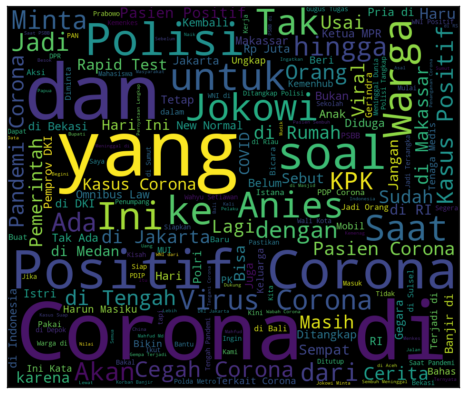

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# buruk (v4)
from wordcloud import WordCloud

plt.style.use('seaborn-white')
plt.figure(figsize = (12,7))
wc = WordCloud(max_words = 200, width = 950, height = 800).generate(' '.join(train[train.category == 'news'].title))
plt.xticks([])
plt.yticks([])
plt.imshow(wc , interpolation = 'bilinear');

## Check for text length

q1 len:8.0, mean len:9.278887885263599, median len:9.0, q3 len:11.0


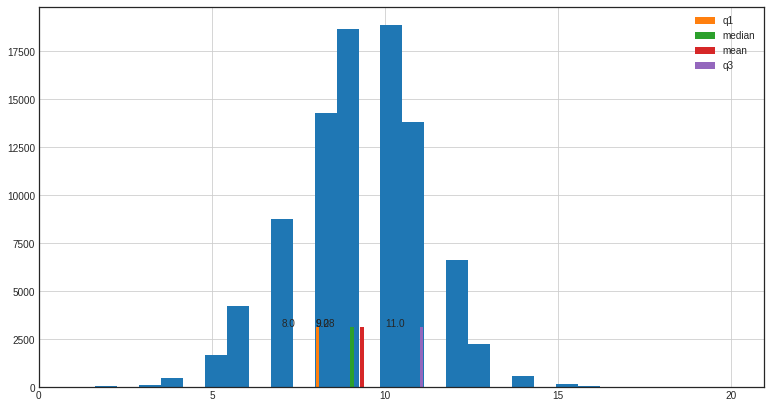

In [180]:
# max_len = 10 to 12 (make all sentences have the same lengths) - for padding
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,7))
seq_len = [len(i.split()) for i in train['title']]

qty_central_tdncy = 3150
q1, mean, median, q3 = np.quantile(seq_len, q=.25), np.mean(seq_len), np.median(seq_len), np.quantile(seq_len, q=.75)

pd.Series(seq_len).hist(bins = 30, label='')
pd.Series([q1] * qty_central_tdncy).hist(label='q1')
pd.Series([median] * qty_central_tdncy).hist(label='median')
pd.Series([mean] * qty_central_tdncy).hist(label='mean')
pd.Series([q3] * qty_central_tdncy).hist(label='q3')
plt.xticks([0,5,10,15,20]);
plt.legend();
plt.annotate(round(q1,2), (int(q1)-1, qty_central_tdncy + 15));
plt.annotate(round(median,2), (int(median)-1, qty_central_tdncy + 15));
plt.annotate(round(mean,2), (int(mean)-1, qty_central_tdncy + 15));
plt.annotate(round(q3,2), (int(q3)-1, qty_central_tdncy + 15));

print(f'q1 len:{q1}, mean len:{mean}, median len:{median}, q3 len:{q3}')

In [117]:
def abbrev_filter(text):
    words_abbrev = [i for i in text.split()]
    leng_abbrev = [i for i in words_abbrev if len(i)<5]
    return leng_abbrev

full_abbrev = []
abb_tr = train.title.apply(abbrev_filter)
for i in list(abb_tr):
    for a in range(len(i)):
        full_abbrev.append(i[a])

print(len(set(full_abbrev)), len(full_abbrev))
# set(full_abbrev)

7920 264343


In [171]:
# def abbrev_filter2(text):
#     words_abbrev = [i for i in text.split()]
#     leng_abbrev = [i for i in words_abbrev if len(i)<5]
#     return leng_abbrev

# full_abbrev2 = []
# abb_tr2 = train.title_clean.apply(abbrev_filter2)
# for i in list(abb_tr2):
#     for a in range(len(i)):
#         full_abbrev2.append(i[a])

# print(len(set(full_abbrev2)), len(full_abbrev2))
# # set(full_abbrev)

5668 126565


# Cleaning Dataset

In [129]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 8.4MB/s 


In [132]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize
from multiprocessing.dummy import Pool as ThreadPool  
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('stopwords')
nltk.download('punkt')

# Removing the stopwords from text
def remove_stopwords(text):
  final_text = []
  factory_stop = StopWordRemoverFactory()
  stop_sastrawi = factory_stop.get_stop_words()
  stop_corpus_in = stopwords.words('indonesian')
  stop_corpus_en = stopwords.words('english')
  #     more_stopword = ['dengan', 'ia', 'bahwa','oleh', 'yg', 'dlm']
  # more_stopword = ['dengan', 'ia', 'bahwa','oleh', 'yg', 'dlm', 'deh', 
  #                  'sih', 'lg', 'krn', 'tlg', 'jk', 'sdh', 'tp', 'dpt',
  #                  'gt', '&', 'nya', 'duh', 'dih', 'kok', 'nah', 'an',
  #                 'donk', 'dung', 'dong', 'duns']

  stop = stop_sastrawi + stop_corpus_in + stop_corpus_en
  stop = set(stop)

  for i in text.split():
    if i.strip().lower() not in stop:
      final_text.append(i.strip())
  return ' '.join(final_text)

# Removing all the noisy text
def denoise_text(text):
    '''full process'''
    text = remove_stopwords(text) #can't use with threadpool
    text = re.sub('\d', '', text).lower()
    text = ' '.join([i.strip() for i in text.split()])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [134]:
train['title_clean'] = train.title.apply(denoise_text)
train.head()

,title,category,title_clean
0,Kemnaker Awasi TKA di Meikarta,finance,kemnaker awasi tka meikarta
1,BNI Digitalkan BNI Java Jazz 2020,finance,bni digitalkan bni java jazz
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance,"terbang australia, edhy prabowo genjot budi da..."
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance,ojk siapkan stimulus ekonomi antisipasi dampak...
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance,saran anies-rk mangkir rapat banjir dpr


# Data Preparation

In [135]:
# # for class weight 'ON'
# from sklearn.model_selection import train_test_split

# title_text = train.title_clean.values
# cat_text = train.category.values

# train_x, valid_x, train_y, valid_y = train_test_split(title_text, cat_text, stratify=cat_text, test_size=.2)

# train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((72625,), (18157,), (72625,), (18157,))

In [156]:
# split first before oversampling to prevent data overfit!
from sklearn.model_selection import train_test_split

train_data, valid_data = train_test_split(train, stratify=train['category'], test_size=.2)

train_data.shape, valid_data.shape

((72625, 3), (18157, 3))

In [159]:
# oversampling (set class_weight to None)
nws = train[train.category == 'news']
hot = train[train.category == 'hot']
fnc = train[train.category == 'finance']
trv = train[train.category == 'travel']
net = train[train.category == 'inet']
hlt = train[train.category == 'health']
oto = train[train.category == 'oto']
fdd = train[train.category == 'food']
spr = train[train.category == 'sport']

hot_ov = pd.concat([hot, hot])
fnc_ov = pd.concat([fnc, fnc])
trv_ov = pd.concat([trv, trv, trv, trv, trv])
net_ov = pd.concat([net, net, net, net, net])
hlt_ov = pd.concat([hlt, hlt, hlt, hlt, hlt, hlt])
oto_ov = pd.concat([oto, oto, oto, oto, oto, oto, oto])
fdd_ov = pd.concat([fdd, fdd, fdd, fdd, fdd, fdd, fdd])
spr_ov = pd.concat([spr, spr, spr, spr, spr, spr, spr, spr, spr, spr, spr, spr, spr])

x_over = pd.concat([nws, hot_ov, fnc_ov, trv_ov, net_ov, hlt_ov, oto_ov, fdd_ov, spr_ov])
tr_over = x_over.sample(frac=1).reset_index(drop=True)

In [165]:
train_x = tr_over.title_clean.values
train_y = tr_over.category.values
valid_x = valid_data.title_clean.values
valid_y = valid_data.category.values

train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((275192,), (18157,), (275192,), (18157,))

In [166]:
from collections import Counter

print(Counter(train_y))
print(Counter(valid_y))

Counter({'hot': 32560, 'news': 32318, 'travel': 32240, 'sport': 31616, 'oto': 30590, 'food': 30191, 'health': 29358, 'finance': 28214, 'inet': 28105})
Counter({'news': 6464, 'hot': 3256, 'finance': 2821, 'travel': 1290, 'inet': 1124, 'health': 979, 'oto': 874, 'food': 863, 'sport': 486})


In [167]:
print(Counter(y_tr))

Counter({5: 25854, 3: 13024, 0: 11286, 8: 5158, 4: 4497, 2: 3914, 6: 3496, 1: 3450, 7: 1946})


In [168]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_tr = le.fit_transform(train_y)
y_val = le.transform(valid_y)

In [172]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

VAL_PDTR = 'post'

tokenizer = Tokenizer(num_words=5500, oov_token='<OOV>')
tokenizer.fit_on_texts(train_x) 
 
sekuens_train = tokenizer.texts_to_sequences(train_x)
sekuens_valid = tokenizer.texts_to_sequences(valid_x)
 
padded_train = pad_sequences(sekuens_train, truncating=VAL_PDTR, padding=VAL_PDTR, maxlen=12) 
padded_valid = pad_sequences(sekuens_valid, truncating=VAL_PDTR, padding=VAL_PDTR, maxlen=12)

# Modelling

In [98]:
!pip install tensorflow-addons

     |████████████████████████████████| 686kB 6.9MB/s 


In [173]:
import time
import datetime
import tensorflow as tf
from tensorflow_addons.optimizers import AdamW
tf.random.set_seed(233)

SCHEDULE = tf.optimizers.schedules.PiecewiseConstantDecay([1407*20, 1407*30], [1e-3, 1e-4, 1e-5])
step = tf.Variable(0, trainable=False)
schedule = tf.optimizers.schedules.PiecewiseConstantDecay([10000, 15000], [1e-0, 1e-1, 1e-2])
LR = 1e-1 * schedule(step)
WD = lambda: 1e-4 * SCHEDULE(step)
OPTIMIZER = AdamW(learning_rate=SCHEDULE, weight_decay=WD)

# imbalanced
CLW = {
    5: 1, 
    3: 2,
    0: 2,
    8: 5,
    4: 5,
    2: 6,
    6: 7,
    1: 7,
    7: 13
}

def build_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(input_dim=5500, output_dim=32))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(.2))
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dense(9, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
  return model

def format_time(elapsed):
  '''
  Takes a time in seconds and returns a string hh:mm:ss
  '''
  # Round to the nearest second.
  elapsed_rounded = int(round((elapsed)))

  # Format as hh:mm:ss
  return str(datetime.timedelta(seconds=elapsed_rounded))

def plot_metrics(history, metrics):
  '''
  Plotting metrik from training process
  '''
  plt.title("Model Performance")
  for metric in metrics:
      plt.plot(history.history[metric],label=metric)
  plt.xlabel("Epoch")
  plt.legend()
  plt.show()

cb = tf.keras.callbacks

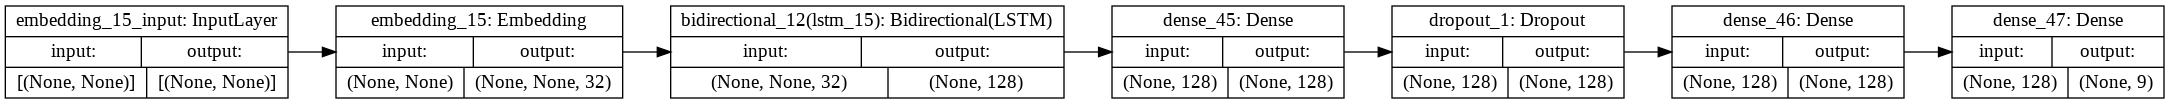

In [174]:
model = build_model()
stopper = cb.EarlyStopping(patience=3, min_delta=0.05, baseline=0.8,
              mode='min', monitor='val_loss', restore_best_weights=True,
              verbose=1)

tf.keras.utils.plot_model(model, show_shapes=True, rankdir='LR')

In [175]:
total_t0 = time.time()

hist = model.fit(padded_train, y_tr, epochs=10, validation_data=(padded_valid, y_val), callbacks=[stopper], class_weight=None)

print('')
print('Training complete!')

print('Total training took {:} (h:mm:ss)'.format(format_time(time.time()-total_t0)))

Epoch 1/10
8600/8600 [==============================] - 140s 16ms/step - loss: 0.5303 - accuracy: 0.8265 - val_loss: 0.3956 - val_accuracy: 0.8604
Epoch 2/10
8600/8600 [==============================] - 137s 16ms/step - loss: 0.2779 - accuracy: 0.9095 - val_loss: 0.3034 - val_accuracy: 0.8872
Epoch 3/10
8600/8600 [==============================] - 136s 16ms/step - loss: 0.1991 - accuracy: 0.9344 - val_loss: 0.2546 - val_accuracy: 0.9070
Epoch 4/10
8600/8600 [==============================] - 137s 16ms/step - loss: 0.1322 - accuracy: 0.9567 - val_loss: 0.1680 - val_accuracy: 0.9412
Epoch 5/10
8600/8600 [==============================] - 135s 16ms/step - loss: 0.0928 - accuracy: 0.9703 - val_loss: 0.1436 - val_accuracy: 0.9503
Epoch 6/10
8600/8600 [==============================] - 135s 16ms/step - loss: 0.0803 - accuracy: 0.9747 - val_loss: 0.1401 - val_accuracy: 0.9516
Epoch 7/10
8600/8600 [==============================] - 134s 16ms/step - loss: 0.0790 - accuracy: 0.9748 - val_loss: 0

# Evaluation

In [190]:
# fig, axs = plt.subplots(1, 2)

# axs[1].plot(plot_metrics(hist, ['accuracy', 'val_accuracy']))
# axs[0].plot(plot_metrics(hist, ['loss', 'val_loss']))

In [187]:
eval_df = pd.DataFrame(hist.history)
length = len(eval_df)

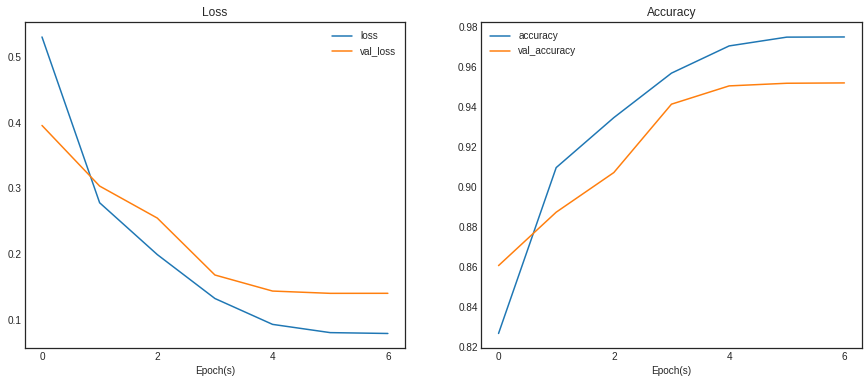

In [189]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

eval_df[['loss','val_loss']].plot(ax=ax[0])
ax[0].set(title='Loss', xlabel='Epoch(s)', xticks=range(0,length,2))

eval_df[['accuracy','val_accuracy']].plot(ax=ax[1])
ax[1].set(title='Accuracy', xlabel='Epoch(s)', xticks=range(0,length,2));

In [218]:
text_sample = ['L. Hamilton kembali menjuarai kompetisi F1 untuk yang ke sekian kalinya',
               'sayang keuangan di perusahaan tersebut kini tengah naik turun']
text_sm_cl = [denoise_text(i) for i in text_sample]

sekuens_sample = tokenizer.texts_to_sequences(text_sm_cl)
padded_sample = pad_sequences(sekuens_sample, truncating=VAL_PDTR, padding=VAL_PDTR, maxlen=12) 

le.inverse_transform(np.argmax(model.predict(padded_sample), axis=1))

array(['oto', 'finance'], dtype=object)

**<center> Thank You** 
<br>&copy;2021